# Food Choices

#This dataset includes information on food choices, nutrition, preferences, childhood favorites, and other information from college students. There are 126 responses from students

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/ds_projects/food_coded.csv')
dataset.head(3)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.


# Data cleaning

In [3]:
dataset.shape

(125, 61)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [5]:
dataset.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         26
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

In [6]:
dataset.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [7]:
#Handling missing data 
obj_col = dataset.select_dtypes(include='object').columns
for i in obj_col:
    dataset[i].fillna(dataset[i].mode()[0],inplace = True)
float_col = dataset.select_dtypes(include='float64').columns
for j in float_col: 
    dataset[j].fillna(dataset[j].mean(),inplace = True)

C:\Users\abina\AppData\Local\Temp\ipykernel_23148\1153662977.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0],inplace = True)
C:\Users\abina\AppData\Local\Temp\ipykernel_23148\1153662977.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [8]:
dataset.isnull().sum()

GPA                 0
Gender              0
breakfast           0
calories_chicken    0
calories_day        0
                   ..
type_sports         0
veggies_day         0
vitamins            0
waffle_calories     0
weight              0
Length: 61, dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [10]:
#Handling inconsistent data 

In [24]:
dataset['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3', '3.65',
       '3.89', '2.9', '3.605', '3.83', '3.292', '3.35', '3.45', '2.6',
       '3.67', '3.73', '3.79', '2.71', '3.68', '3.75', '3.92', '3.43',
       '3.77', '3.63', '3.882'], dtype=object)

In [25]:
dataset['GPA'] = dataset['GPA'].replace({
    "Personal " :'3.45' ,
    '3.79 bitch' :'3.79',
    "Unknown" : "3.43"
})

In [26]:
isinstance(dataset['type_sports'],object)

True

In [27]:
dataset['weight'].unique()

array([187, 155, 130, 240, 190, 180, 137, 125, 116, 110, 264, 123, 185,
       145, 170, 135, 165, 175, 195, 105, 160, 167, 115, 205, 128, 150,
       140, 120, 100, 113, 168, 169, 200, 265, 192, 118, 210, 112, 144,
       127, 129, 260, 184, 230, 138, 156])

In [28]:
dataset['weight'] = dataset['weight'].astype('int64')

In [29]:
dataset['GPA'] = dataset['GPA'].astype('float64')

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  125 non-null    object 
 8   comfort_food_reasons          125 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [31]:
dataset.select_dtypes(include = 'object').columns

Index(['comfort_food', 'comfort_food_reasons', 'diet_current',
       'eating_changes', 'father_profession', 'fav_cuisine', 'food_childhood',
       'healthy_meal', 'ideal_diet', 'meals_dinner_friend',
       'mother_profession', 'type_sports'],
      dtype='object')

In [32]:
# Hnadling Duplicate data
dataset.drop_duplicates(inplace=True)

In [33]:
dataset.duplicated().sum()

np.int64(0)

In [34]:
#encoding 
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
obj_array = dataset.select_dtypes(include = 'object').columns

In [51]:
tf_en = TfidfVectorizer()
encoding = {}
for obj in obj_array: 
    encoding[obj] = tf_en.fit_transform(dataset[obj])    
encoding

{'comfort_food': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 630 stored elements and shape (125, 174)>,
 'comfort_food_reasons': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 466 stored elements and shape (125, 165)>,
 'diet_current': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 1653 stored elements and shape (125, 450)>,
 'eating_changes': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 1158 stored elements and shape (125, 365)>,
 'father_profession': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 245 stored elements and shape (125, 153)>,
 'fav_cuisine': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 181 stored elements and shape (125, 60)>,
 'food_childhood': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 454 stored elements and shape (125, 140)>,
 'healthy_meal': <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 945 stored elements and shape (125, 249)>,

In [42]:
for col_name, encoded_data in encoding.items():
    print(f"Column '{col_name}': Shape = {encoded_data.shape}")
    print(f"Data type: {type(encoded_data)}")
    print("---")

Column 'comfort_food': Shape = (125, 174)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'comfort_food_reasons': Shape = (125, 165)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'diet_current': Shape = (125, 450)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'eating_changes': Shape = (125, 365)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'father_profession': Shape = (125, 153)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'fav_cuisine': Shape = (125, 60)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'food_childhood': Shape = (125, 140)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'healthy_meal': Shape = (125, 249)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'ideal_diet': Shape = (125, 425)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'meals_dinner_friend': Shape = (125, 181)
Data type: <class 'scipy.sparse._csr.csr_matrix'>
---
Column 'mother_profe

In [47]:
print(encoding['eating_changes'][:5, :10].toarray())
feature_names = tf_en.get_feature_names_out()
print(f"First 10 features: {feature_names[:10]}")

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.41756354 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]
First 10 features: ['and' 'at' 'back' 'band' 'baseball' 'basketball' 'can' 'car' 'collegiate'
 'competitive']


In [62]:
encoded_dataset = dataset.select_dtypes(exclude= 'object')
for col_name, encoded_data in encoding.items(): 
    feature_names = [f"{col_name}_feature_{i}" for i in range (encoded_data.shape[1])]
    encoded_df = pd.DataFrame(encoded_data.toarray(),columns = feature_names , index= dataset.index)
    encoded_dataset = pd.concat([encoded_dataset,encoded_df],axis = 1)

dataset = encoded_dataset

In [63]:
dataset.shape

(125, 5221)

In [64]:
dataset.head(3)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,type_sports_feature_56,type_sports_feature_57,type_sports_feature_58,type_sports_feature_59,type_sports_feature_60,type_sports_feature_61,type_sports_feature_62,type_sports_feature_63,type_sports_feature_64,type_sports_feature_65
0,2.400,2,1,430,3.028302,315.0,1,9.0,2.0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.654,1,1,610,3.000000,420.0,2,1.0,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.300,1,1,720,4.000000,420.0,2,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Data Scaling and Transformation 
dataset.describe()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,type_sports_feature_56,type_sports_feature_57,type_sports_feature_58,type_sports_feature_59,type_sports_feature_60,type_sports_feature_61,type_sports_feature_62,type_sports_feature_63,type_sports_feature_64,type_sports_feature_65
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,3.420296,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,...,0.034497,0.004493,0.002862,0.004475,0.006594,0.004475,0.054253,0.008748,0.002862,0.037381
std,0.383804,0.490161,0.316636,131.214156,0.588294,229.907814,0.43359,1.814679,1.025714,1.910987,...,0.173540,0.050233,0.031997,0.050035,0.073719,0.050035,0.204929,0.068906,0.031997,0.185735
min,2.200000,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.500000,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.700000,2.000000,1.000000,720.000000,3.028302,420.000000,2.00000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,...,1.000000,0.561626,0.357737,0.559405,0.824207,0.559405,1.000000,0.560905,0.357737,1.000000


C:\Users\abina\AppData\Local\Temp\ipykernel_23148\1195747569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['calories_scone'])


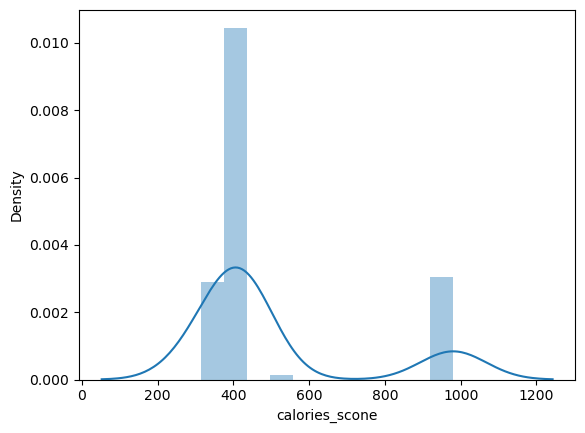

In [72]:
sns.distplot(dataset['calories_scone'])
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler

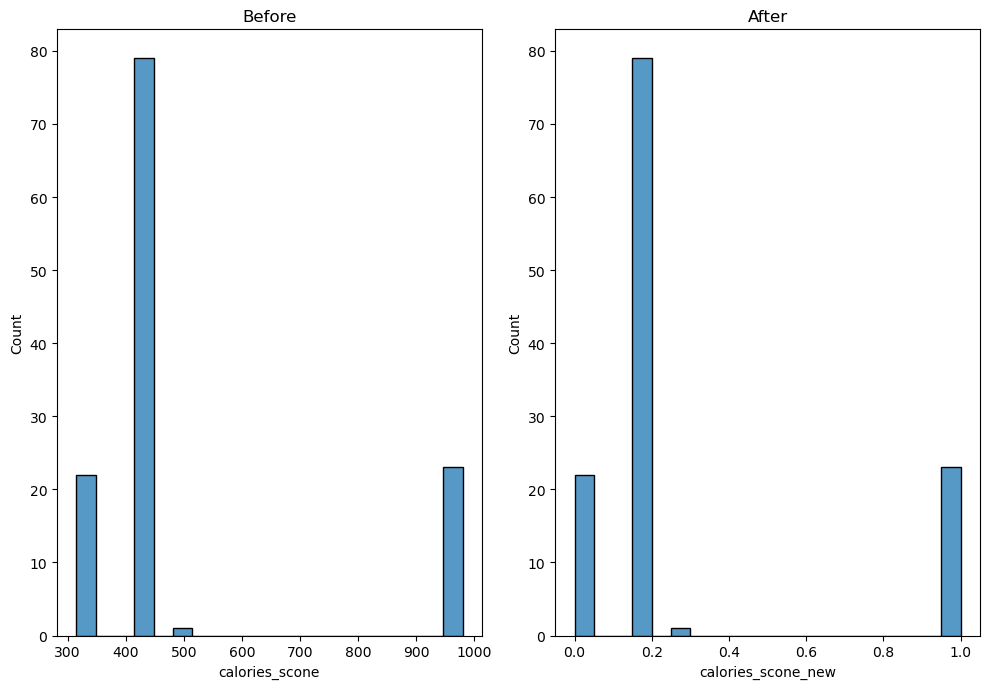

In [77]:
ss = MinMaxScaler()
dataset['calories_scone_new'] = pd.DataFrame(ss.fit_transform(dataset[["calories_scone"]]),columns=['x'])
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(dataset['calories_scone'], bins= 20)
plt.subplot(1,2,2)
plt.title("After")
sns.histplot(dataset['calories_scone_new'], bins= 20)
plt.tight_layout()
plt.show()

In [78]:
#Outliers Detecting and Handling
dataset.describe()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,type_sports_feature_57,type_sports_feature_58,type_sports_feature_59,type_sports_feature_60,type_sports_feature_61,type_sports_feature_62,type_sports_feature_63,type_sports_feature_64,type_sports_feature_65,calories_scone_new
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,3.420296,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,...,0.004493,0.002862,0.004475,0.006594,0.004475,0.054253,0.008748,0.002862,0.037381,0.286078
std,0.383804,0.490161,0.316636,131.214156,0.588294,229.907814,0.43359,1.814679,1.025714,1.910987,...,0.050233,0.031997,0.050035,0.073719,0.050035,0.204929,0.068906,0.031997,0.185735,0.345726
min,2.200000,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895
50%,3.500000,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895
75%,3.700000,2.000000,1.000000,720.000000,3.028302,420.000000,2.00000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895
max,4.000000,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,...,0.561626,0.357737,0.559405,0.824207,0.559405,1.000000,0.560905,0.357737,1.000000,1.000000


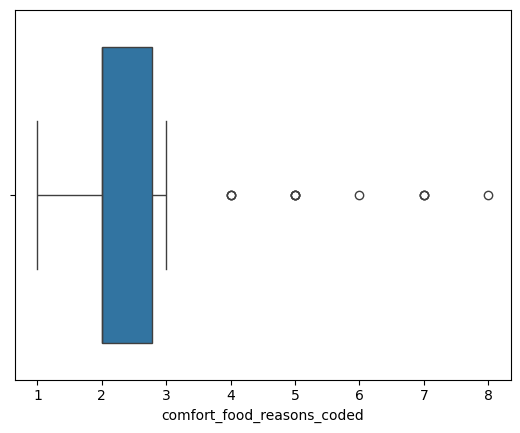

In [90]:
sns.boxplot(x=dataset['comfort_food_reasons_coded'],data=dataset)
plt.show()

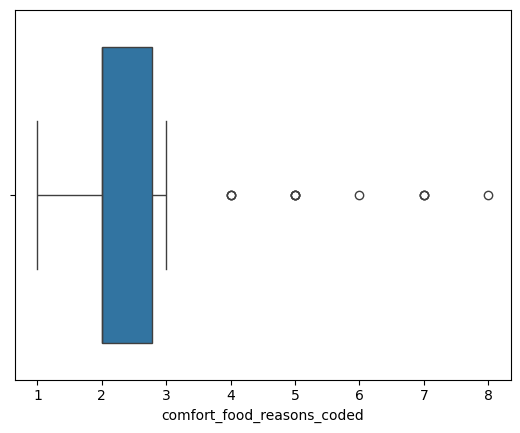

In [91]:
z_score = (dataset['comfort_food_reasons_coded']-dataset['comfort_food_reasons_coded'].mean())/(dataset['comfort_food_reasons_coded'].std())
dataset['Z_SCORE']=z_score
dataset[dataset['Z_SCORE'].abs()<3]
sns.boxplot(x = dataset['comfort_food_reasons_coded'], data= dataset)
plt.show()

#since there were less outliers in the data, so some of the outliers were not removed.

In [93]:
dataset.to_csv("food choices.ipynb.csv", index=False)